# Continuing Analysis

In this file we will be continuing our analysis of the housing dataset. In order to improve the model there will be a few additional changes to the EDA process, as well as an analysis of the features to move down the number of features involved. Finally, there will be a different model trained, with different combinations of activations functions to try and lower our RMSE.

In [1]:
# Import the nessesary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!wget https://raw.githubusercontent.com/hixtape1212/Group1Capstone/Gerardo/Austin_notebooks/austinHousingData.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
file_path = 'Austin_notebooks/austinHousingData.csv'
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [5]:
#Let's look at the home types. We primarily only want single family homes
df.homeType.value_counts()

Single Family            14241
Condo                      470
Townhouse                  174
Multiple Occupancy          96
Vacant Land                 83
Residential                 37
Apartment                   37
Mobile / Manufactured       17
MultiFamily                 10
Other                        6
Name: homeType, dtype: int64

In [6]:
df = df[df.homeType == 'Single Family']
df.shape

(14241, 47)

In [7]:
#Drop object columns as well as zipid
col_drop_list = df.select_dtypes(include=[np.object]).keys()
col_drop_list = col_drop_list.union(['zpid'])
df = df.drop(col_drop_list, axis=1)
df.shape

C:\Users\gyanezarvizu\AppData\Local\Temp\ipykernel_2928\1663181986.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  col_drop_list = df.select_dtypes(include=[np.object]).keys()


(14241, 39)

In [8]:
#Changing Booleans to int values
col_bool_list = ['hasAssociation', 'hasCooling',
                 'hasGarage', 'hasHeating', 'hasSpa', 'hasView']

for col in col_bool_list:
    name = col + '_int'
    df[name] = df[col].astype(int)

df = df.drop(col_bool_list, axis=1)
df.shape

(14241, 39)

In [9]:
#Now we should have a dataset that is all Single Family homes w/ integer values
#Lets look at the home prices we are predicting
df.describe().transpose().apply(lambda x: x.apply('{0:f}'.format))

,count,mean,std,min,25%,50%,75%,max
zipcode,14241.000000,78736.186785,18.721340,78617.000000,78727.000000,78739.000000,78749.000000,78759.000000
latitude,14241.000000,30.291740,0.098383,30.085030,30.201195,30.284163,30.367920,30.517174
longitude,14241.000000,-97.780411,0.085880,-98.022057,-97.841804,-97.771988,-97.718689,-97.569504
propertyTaxRate,14241.000000,1.994731,0.054207,1.980000,1.980000,1.980000,1.980000,2.210000
garageSpaces,14241.000000,1.236851,1.343474,0.000000,0.000000,1.000000,2.000000,20.000000
parkingSpaces,14241.000000,1.236219,1.343612,0.000000,0.000000,1.000000,2.000000,20.000000
yearBuilt,14241.000000,1988.408749,21.555337,1905.000000,1974.000000,1993.000000,2006.000000,2020.000000
latestPrice,14241.000000,516387.884629,446969.176124,5500.000000,310000.000000,409900.000000,575000.000000,13500000.000000
numPriceChanges,14241.000000,3.044730,2.491960,1.000000,1.000000,2.000000,4.000000,23.000000
latest_salemonth,14241.000000,6.728039,3.134325,1.000000,4.000000,7.000000,9.000000,12.000000


From the previous table the price ranges wildly between 5500 and 13Milion

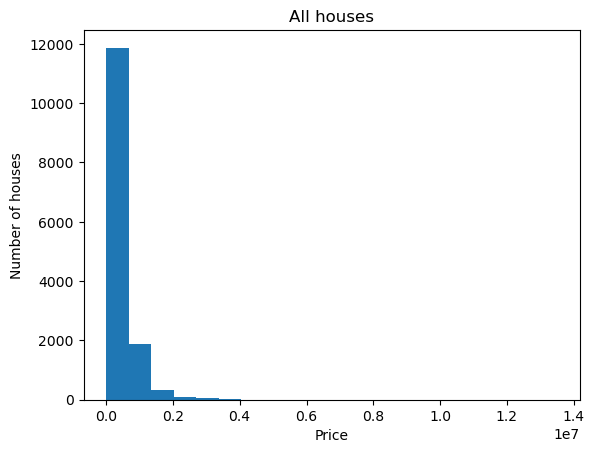

In [10]:
# Plot latestPrice
plt.hist(df['latestPrice'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of houses')
plt.title('All houses')
plt.show()

In [11]:
#Narrowing this down can help our model. Lets look at the mid 5 & 95%
upper = np.percentile(df.latestPrice, 95)
lower = np.percentile(df.latestPrice, 5)

print('Middle 90 are values between {} and {}'.format(lower, upper))

Middle 90 are values between 207000.0 and 1175000.0


The middle 95% of the home values are between 207,000 and 1,175,000. If we move the lower bound down I think we should be looking at home from 200,000 to 1.1 million, covering roughly 95% of our data

In [12]:
df = df.drop(df[df['latestPrice'] < 200000].index)
df = df.drop(df[df['latestPrice'] > 1175000].index)
df.shape

(12907, 39)

Now the data should be at the point where we want it. Let's try to run a new model and see where it get's us. I think running something similar to the last one should work fine.

## Analysis
We will start looking the correlation of variables with our dependen variable (latestPrice) and then we will see if we have a symmetric distribution.

#### Check corelation with latestPrice

In [13]:
df.corr()['latestPrice']

zipcode                      -0.188523
latitude                      0.114658
longitude                    -0.263563
propertyTaxRate              -0.068051
garageSpaces                  0.150064
parkingSpaces                 0.149677
yearBuilt                    -0.039928
latestPrice                   1.000000
numPriceChanges               0.034400
latest_salemonth              0.050514
latest_saleyear               0.068581
numOfPhotos                   0.172712
numOfAccessibilityFeatures    0.022540
numOfAppliances               0.042001
numOfParkingFeatures          0.096584
numOfPatioAndPorchFeatures    0.110987
numOfSecurityFeatures         0.078760
numOfWaterfrontFeatures       0.031016
numOfWindowFeatures           0.109137
numOfCommunityFeatures        0.004434
lotSizeSqFt                   0.039251
livingAreaSqFt                0.369748
numOfPrimarySchools          -0.173300
numOfElementarySchools        0.136677
numOfMiddleSchools            0.130154
numOfHighSchools         

We dont have multicollinearity

#### Display distribution

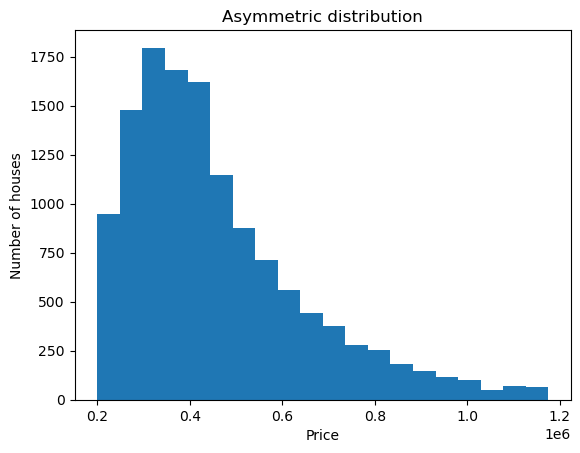

In [14]:
plt.hist(df['latestPrice'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of houses')
plt.title('Asymmetric distribution')
plt.show()

We can see an asymmetric distribution and could apply a logarithmic function to deal with this

In [15]:
# Applying logarithmic funtion
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
df_log = transformer.transform(df)

C:\Users\gyanezarvizu\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\Users\gyanezarvizu\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:205: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


In [16]:
# Making a new dataframe with logarithmic data
columns_names = df.columns

df_log = pd.DataFrame(df_log, columns= columns_names)
df_log.head(3)

,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,...,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,hasAssociation_int,hasCooling_int,hasGarage_int,hasHeating_int,hasSpa_int,hasView_int
0,11.272903,3.447783,NaN,1.091923,1.098612,1.098612,7.607381,12.628070,1.791759,2.302585,...,2.70805,1.386294,1.609438,1.098612,0.693147,0.693147,0.693147,0.693147,0.0,0.0
1,11.272903,3.447848,NaN,1.091923,1.098612,1.098612,7.607878,12.594734,0.693147,2.397895,...,2.70805,1.098612,1.609438,0.693147,0.693147,0.693147,0.693147,0.693147,0.0,0.0
2,11.272903,3.447118,NaN,1.091923,0.000000,0.000000,7.610358,12.453425,0.693147,2.079442,...,2.70805,1.098612,1.386294,0.693147,0.693147,0.693147,0.000000,0.693147,0.0,0.0


 Column 'longitude' has negative numbers, after applying the logarithmic function data became NaN, so we have to delete it

In [17]:
# Delete longitude column
df_log = df_log.drop('longitude', axis=1)
df.head(3)

,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,...,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,hasAssociation_int,hasCooling_int,hasGarage_int,hasHeating_int,hasSpa_int,hasView_int
0,78660,30.430632,-97.663078,1.98,2,2,2012,305000,5,9,...,14,3.0,4,2,1,1,1,1,0,0
1,78660,30.432672,-97.661697,1.98,2,2,2013,295000,1,10,...,14,2.0,4,1,1,1,1,1,0,0
2,78660,30.409748,-97.639771,1.98,0,0,2018,256125,1,7,...,14,2.0,3,1,1,1,0,1,0,0


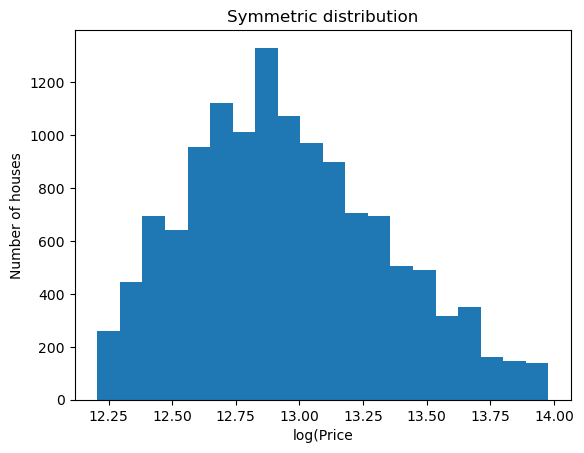

In [18]:
plt.hist(df_log['latestPrice'], bins=20)
plt.xlabel('log(Price')
plt.ylabel('Number of houses')
plt.title('Symmetric distribution')
plt.show()

### Creating testing and training data

In [19]:
# Getting column names
column_names=df_log.columns.tolist()

# Deleting the name of the dependent name 'latestPrice'
column_names.remove('latestPrice')

In [79]:
# Independent values
X = df_log[column_names]

# Dependent values
y = df_log['latestPrice']

In [92]:
# importing train_test_split to create testing and trainin data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [93]:
# Comparing size of X sets
print(X.shape, X_train.shape, X_test.shape)

(12907, 37) (9680, 37) (3227, 37)


### Linear regression with StatsModels

In [37]:
import statsmodels.api as sm

In [38]:
# Creating the model
model = sm.OLS(endog=y_train, exog=sm.add_constant(X_train))

In [39]:
# Get model results
results = model.fit()

In [40]:
# Displey results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            latestPrice   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     451.6
Date:                Sun, 30 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:31:49   Log-Likelihood:                 148.22
No. Observations:               10325   AIC:                            -220.4
Df Residuals:                   10287   BIC:                             54.76
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Coeffincient of determination is 0.619, the better is close to 1
In other words this model is explaining only the 61.9% of data

### Evaluation RMSE

#### Using train

In [27]:
# Get y_train prediction with X_train using the model
y_train_pred = results.predict(sm.add_constant(X_train))
y_train_pred.shape

(10325,)

In [28]:
# RMSE between y_train and y_train_pred
from sklearn.metrics import mean_squared_error
RMSE_train=mean_squared_error(np.expm1(y_train), np.expm1(y_train_pred), squared=False)
RMSE_train

123086.43509159947

Our model is off by about 123,086 dollars in a given prediction

#### Using test

In [29]:
# Get y_test prediction with X_test using the model
y_test_pred = results.predict(sm.add_constant(X_test))

In [30]:
# RMSE between y_test and y_test_pred
RMSE_test=mean_squared_error(np.expm1(y_test), np.expm1(y_test_pred), squared=False)
RMSE_test

138073.84478346285

Our model is off by about 138073 dollars in a given prediction

In [31]:
# as long as the difference is small the model is consistent
diff = (RMSE_test - RMSE_train)/ RMSE_test *100
diff

10.854633414002258

10.85% of difference between RMSE_train and RMSE_test

In [32]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(np.expm1(y_train), np.expm1(y_train_pred))

85913.19867027075

In [33]:
mean_absolute_error(np.expm1(y_test), np.expm1(y_test_pred))

85867.17242130666

### Desicion tree

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
# Initializing model
dtr = DecisionTreeRegressor(random_state = 42, max_depth=9)

In [96]:
# Train model
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=42)

In [97]:
# Testing X_test
predictor_test = dtr.predict(X_test)

In [98]:
#pip install sklearn

In [99]:
#pip install -U yellowbrick

C:\Users\gyanezarvizu\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


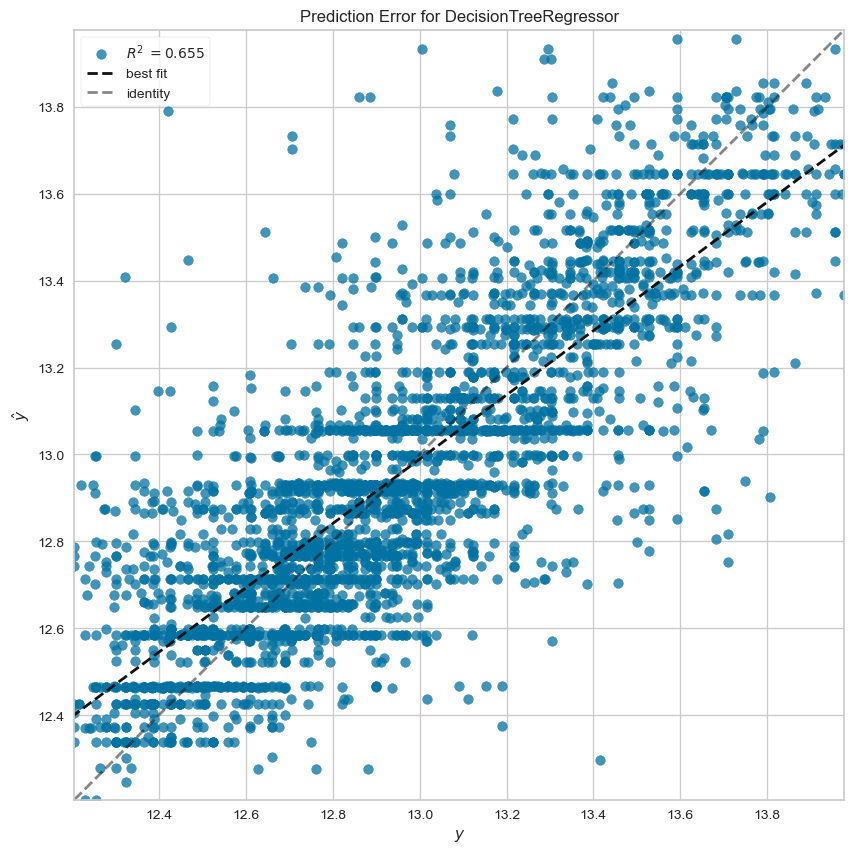

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [100]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10,10))
pev = PredictionError(dtr)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

In [101]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictor_test)
r_squared

0.6551591727765937

### Random forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
# Initializing model
rf = RandomForestRegressor(random_state=42, max_depth=9, n_estimators=50)

In [143]:
# Train model
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, n_estimators=50, random_state=42)

In [144]:
predictor_test = rf.predict(X_test)

C:\Users\gyanezarvizu\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


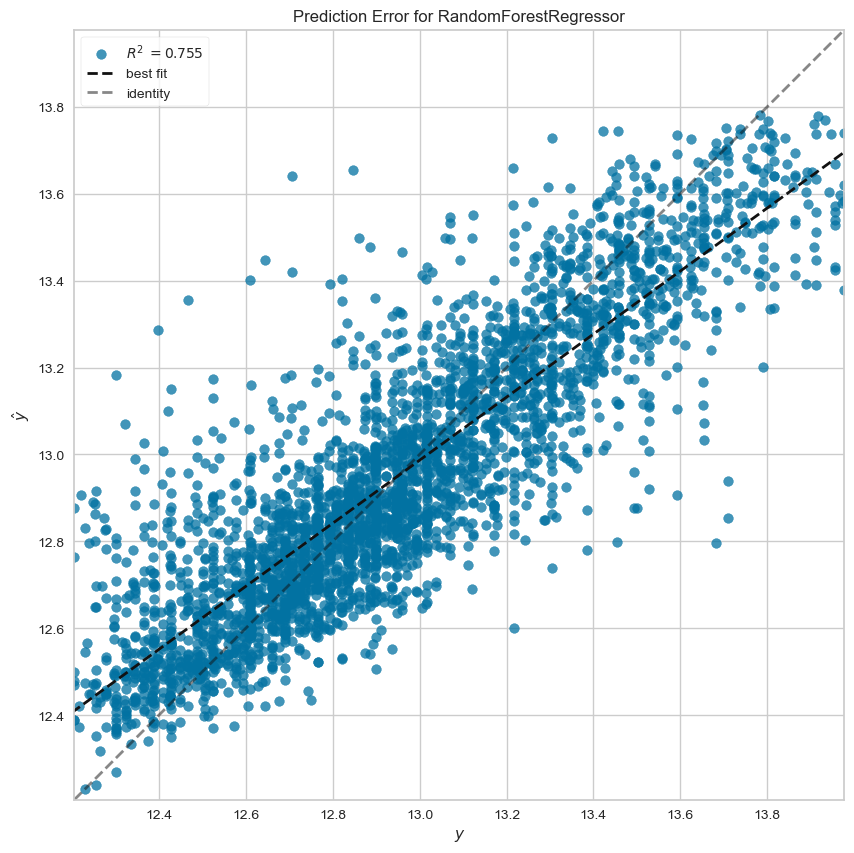

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [145]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10,10))
pev = PredictionError(rf)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

In [146]:
r_squared = r2_score(y_test, predictor_test)
r_squared

0.7553703160569898

tests(20%), 10 trees:
depth - r_squared
9 - 0.7391021104009967
18 - 0.7607296166292814
27 - 0.760018290825104
50 - 0.7576165218893123

tests(25%), 10 trees:
depth - r_squared
9 - 0.7466670838231724
18 - 0.7689406875521607
27 - 0.7690792523753298
50 - 0.7689207750295317

### XGBRegressor

In [150]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 8.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [153]:
from xgboost import XGBRegressor
#import xgboost as xgb
model = XGBRegressor(random_state=42, max_depth=9, n_estimators=50)

In [154]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [155]:
pred_test = model.predict(X_test)

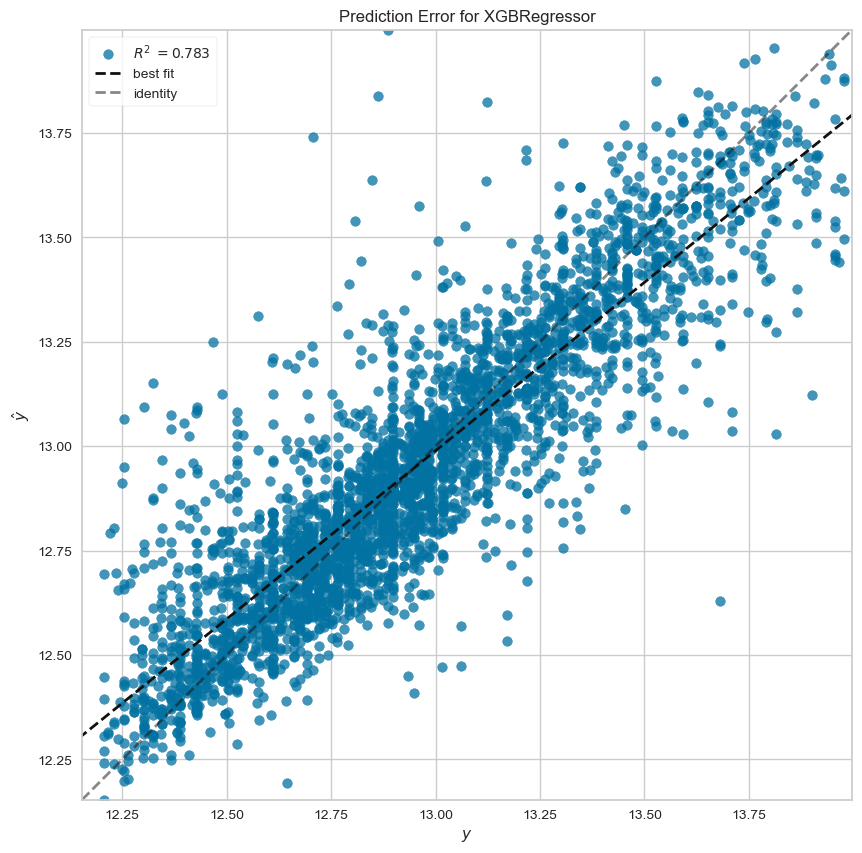

<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [157]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10,10))
pev = PredictionError(model)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

In [158]:
r_squared = r2_score(y_test, pred_test)
r_squared

0.7825312452700752

Results.
* linear regression: R-squared= 0.619
* decision tree: R-squared= 0.6551
* random forest: R-squared= 0.7553
* xgboost: R-squared= 0.7825